# WEEK4 Conditional Mutual Information
## 1. Scissors rock paper analysis

In [2]:
#------------------------------------------------------------
# WHEN RUNNING LOCALLY UPDATE THIS CELL TO SET UP DATASET LOCATION
#------------------------------------------------------------
BASEURITXT='/home/jovyan/notebooks/CSYS5030/data/SPR'

In [3]:
from spr import loadGames, listPlayers, getPlayerAllMovesAndScores, getPlayerEntropyAndRatios
games = loadGames(BASEURITXT)


In [4]:
players = listPlayers(games)
print(players)
print(players[0])

moves, scores = getPlayerAllMovesAndScores('Isabelle', games)



['m-sizzle', 'kc', 'clover', 'isabelle', 'stuart', 'sebastian', 'yizhi']
m-sizzle


In [5]:
entropies, winRatios, lossRatios = getPlayerEntropyAndRatios(players, games)

m-sizzle plays with entropy 1.5602518646164185 and in average a score of 1
winRatio 0.4, lossRatio 0.37777777777777777
kc plays with entropy 1.565596230357602 and in average a score of 3
winRatio 0.4, lossRatio 0.3
clover plays with entropy 1.516147658077609 and in average a score of -3
winRatio 0.16, lossRatio 0.28
isabelle plays with entropy 1.5488102670635504 and in average a score of -4
winRatio 0.29545454545454547, lossRatio 0.38636363636363635
stuart plays with entropy 1.4839123015466111 and in average a score of -3
winRatio 0.2857142857142857, lossRatio 0.37142857142857144
sebastian plays with entropy 1.4396275363413569 and in average a score of 3
winRatio 0.28, lossRatio 0.16
yizhi plays with entropy 1.4987512731845576 and in average a score of 3
winRatio 0.38235294117647056, lossRatio 0.29411764705882354


# Stage 3 -- Conditional entropy calculations

In [6]:
import numpy as np
from week1 import conditionalEntropyEmpirical

def computeConditionalEntropyForPlayer(player:str, games: np.array):

    moves, scores = getPlayerAllMovesAndScores(player, games)
    moves_1 = [[move2, move1] for move1, move2 in list(zip(moves[slice(0, None, 1)], moves[slice(1, None, 1)])) ] 
    conditionalEntropy = conditionalEntropyEmpirical(moves_1)

    scores=np.array(scores)
    scores=scores[1:]  #since we're only calculating entropies from game 2 onwards (conditional on previous game), we cut out the first score
    winRatio=len(list(scores[scores==1]))/len(list(scores))
    lossRatio=len(list(scores[scores==-1]))/len(list(scores))

    return conditionalEntropy, winRatio, lossRatio


In [7]:
computeConditionalEntropyForPlayer('kc', games)


(1.3420580875359998, 0.3793103448275862, 0.3103448275862069)

In [8]:
#----------------------------------------------------
# Compute conditional entropy for all Players 
#----------------------------------------------------
players = listPlayers(games)

def computeConditionalEntropyForAllPlayers(players: list, games: np.array):
    
    # initialize lists

    scores=list()
    conditionalEntropies=list()
    lossRatios=list()
    winRatios=list()

    for player in players:
        conditionalEntropy, winRatio, lossRatio = computeConditionalEntropyForPlayer(player, games)
        
        winRatios.append(winRatio)
        lossRatios.append(lossRatio)
        conditionalEntropies.append(conditionalEntropy)

    return conditionalEntropies, winRatios, lossRatios




In [9]:
conditionalEntropies, winRatios, lossRatios = computeConditionalEntropyForAllPlayers(players, games)

In [10]:
# ----------------------------------------------------------------------
# Compute correlation between conditional entropies and win/loss ratios
# -----------------------------------------------------------------------

np.corrcoef(conditionalEntropies, winRatios)

array([[1.        , 0.56104977],
       [0.56104977, 1.        ]])

In [11]:
np.corrcoef(conditionalEntropies, lossRatios)

array([[1.        , 0.57766723],
       [0.57766723, 1.        ]])

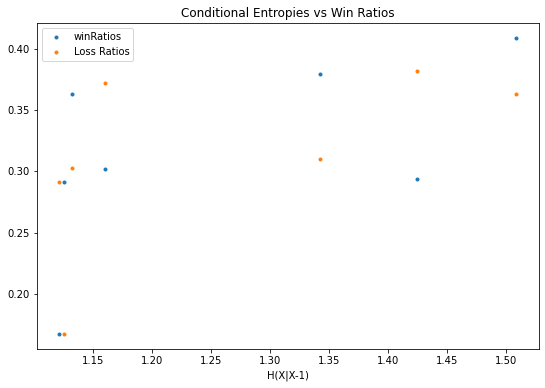

In [12]:
#------------------------------------------------------------
#   PLOT Conditional Entropies vs Ratios
#------------------------------------------------------------


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(conditionalEntropies, winRatios, '.', label='winRatios')
axs.plot(conditionalEntropies, lossRatios, '.', label='Loss Ratios')
axs.set_title('Conditional Entropies vs Win Ratios')
axs.set_xlabel('H(X|X-1)')
plt.legend()
plt.show()


### Some testing of the functions used

In [13]:
tests = [1,2,3,4,5,6,7]
test_1= [[test2, test1] for test1, test2 in list(zip(tests[slice(0, None, 1)], tests[slice(1, None, 1)])) ] 
print(test_1)

[[2, 1], [3, 2], [4, 3], [5, 4], [6, 5], [7, 6]]


In [14]:
tests=tests[1:]

In [15]:
tests

[2, 3, 4, 5, 6, 7]

# Stage 4 -- Mutual information calculations

In [16]:

#-----------------------------------------------------------------------------
# Compute mutual information for a player , mutual information between their
# current move and their previous move and the previous one from the opponent
#-----------------------------------------------------------------------------

def computeMutualInformationForPlayer(player: str, games):
    
    moves, scores, opponentMoves = getPlayerAndOpponentAllMovesAndScores(player, games)

    moves_1 = [[move2, move1, opponentMove1] for move1, move2, opponentMove1 in list(zip(moves[slice(0, None, 1)], moves[slice(1, None, 1)], opponentMoves[slice(0,None,1)])) ] 
    conditionalEntropy = conditionalEntropyEmpirical(moves_1)

    scores=np.array(scores)
    scores=scores[1:]  #since we're only calculating entropies from game 2 onwards (conditional on previous game), we cut out the first score
    winRatio=len(list(scores[scores==1]))/len(list(scores))
    lossRatio=len(list(scores[scores==-1]))/len(list(scores))

    return conditionalEntropy, winRatio, lossRatio

In [17]:
arr = np.array([[1,2,3],[4,5,6]])

list=[0,1]

In [18]:
arr[list]

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
arr[0,1]

2

In [20]:
arr[(0,1)]

2

In [21]:
myvar=(0,1)

In [22]:
arr[myvar]

2

In [23]:
myvar2=[0,1]

In [24]:
arr[myvar2]

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
myvar3=tuple(myvar2)

In [26]:
myvar3

(0, 1)

In [27]:
arr[myvar3]

2

In [28]:
from week1 import jointEntropyEmpiricalOld, jointEntropyEmpirical

jointEntropyEmpirical([[0,0],[0,1],[1,0],[1,1]])

2.0

In [29]:
from week1 import mutualInformationEmpiricalOld, mutualInformationEmpirical

#     mutualinformationempirical([0,0,1,1],[0,1,0,1]) and validating that you get the result 0 bits
# mutualinformationempirical([0,0,1,1],[0,0,1,1]) and validating that you get the result 1 bit
print(mutualInformationEmpirical([[0,0],[0,1],[1,0],[1,1]]))
print(mutualInformationEmpirical([[0,0],[0,0],[1,1],[1,1]]))

0.0
1.0


In [30]:
x = [1,2,3,4]
x=np.array(x)
x

array([1, 2, 3, 4])

In [31]:
x.ndim

1

In [32]:
x.shape[0]

4

In [33]:
x.shape

(4,)

In [34]:
x = x.reshape(x.shape[0],1)

In [35]:
x.shape

(4, 1)

In [36]:
N, D = x.shape

# 4. Coding conditional mutual information

In [39]:
#-------------------------------------------------------------------------------------------------------------------------------
#
# The conditional mutual information between variables x and y, conditional on variable z, for a distribution p(x,y,z) is:
# 
# I(X;Y∣Z)=H(X∣Z)+H(Y∣Z)−H(X,Y∣Z)
#------------------------------------------------------------------------------------------------------------------------------


'''
Test that your code works by running, e.g.:
conditionalmutualinformationempirical([0,0,1,1],[0,1,0,1],[0,1,0,1]) and validating that you get the result 0 bits.
conditionalmutualinformationempirical([0,0,1,1],[0,0,1,1],[0,1,1,0]) and validating that you get the result 1 bit.
conditionalmutualinformationempirical([0,0,1,1],[0,1,0,1],[0,1,1,0]) and validating that you get the result 1 bit. 
'''

from week1 import conditionalEntropyEmpirical, conditionalEntropyEmpiricalXnYn

def conditionalMutualInformationEmpirical(xn: np.array, yn: np.array, zn: np.array):
    
    HXgZ = conditionalEntropyEmpirical([[x, z] for x,z in zip(xn, zn)])
    HYgZ = conditionalEntropyEmpirical([[y, z] for y,z in zip(yn, zn)])
    xnyn = np.column_stack((xn,yn))
    HXYgZ = conditionalEntropyEmpiricalXnYn(xnyn, zn)
    CMI = HXgZ + HYgZ - HXYgZ
    return CMI


In [40]:
conditionalMutualInformationEmpirical([0,0,1,1],[0,1,0,1],[0,1,0,1])

0.0

In [41]:
conditionalMutualInformationEmpirical([0,0,1,1],[0,0,1,1],[0,1,1,0])

1.0

### Challenge: 
 
Let's make a larger empirical test of case c above. First we will generate a large sample of binary values for variable X, X = randi(2, 1000, 1) - 1;, and same for Z, Z = randi(2, 1000, 1) - 1;, then we will construct the samples of y as the exclusive OR (XOR) of these two, Y = xor(X, Z);. Validate using mutualinformationempirical that there is (almost) no mutual information between either X or Z with Y, yet using conditionalmutualinformationempirical that there is (almost) one bit of conditional mutual information from X to Y given Z (or vice versa in X and Z). Explain the meaning of the conditioning on Z increasing the apparent mutual information between X and Y - see part 5 of the lecture, below. (Also: why are the bit values not quite 0 and 1 in this example?)

In [42]:
X = np.random.randint(2, size=1000)
Z = np.random.randint(2, size=1000)
Y = np.logical_xor(X, Z)

In [49]:
from week1 import mutualInformationEmpirical

MI_XY = mutualInformationEmpirical(np.column_stack((X,Y)))
MI_ZY = mutualInformationEmpirical(np.column_stack((Z,Y)))
MI_XZ = mutualInformationEmpirical(np.column_stack((X,Z)))

In [50]:
print(MI_XY)
print(MI_ZY)
print(MI_XZ)

0.0003606945900156422
0.0003606945900156422
0.0001962070664154325
